In [5]:
import pandas as pd
import numpy as np

from keras_preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import json
import requests
import re
from bs4 import BeautifulSoup

import urllib
import matplotlib.pyplot as plt

from collections import Counter
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

%matplotlib inline
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)


import os
os.chdir(r"D:\git\Text-Mining")

In [6]:
def reprocessing(data):
    
    data = [s.replace("."," ") for s in data]
    data = [s.replace("?"," ") for s in data]
    data = [s.replace("!"," ") for s in data]
    data = [s.replace(","," ") for s in data]
    data = [s.replace(","," ") for s in data]
    data = [s.replace("·"," ") for s in data]

    data = [s.replace("  "," ") for s in data]
    data = [re.sub(r'\([^-)]*\)','',s) for s in data]

    data = [s.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") for s in data]

    return data

In [7]:
def spellchecker(q):
    
    if len(q)<500:
        params = urllib.parse.urlencode({
            "_callback": "",
            "q": q
        })
        # 네이버 맞춤법 검사기 사용하여 문법 교정 
        data = urllib.request.urlopen("https://m.search.naver.com/p/csearch/ocontent/spellchecker.nhn?" + params)
        data = data.read().decode("utf-8")[1:-2]
        data = json.loads(data)
        data = data["message"]["result"]["html"]
        data =  BeautifulSoup(data, "html.parser").getText()
        
    else:
        data = ''
    
    return data

In [8]:
data_peonsijo = open("data/peongsijo_modern", encoding = 'utf-8-sig')
data_peonsijo2 = open("data/peongsijo2_modern", encoding = 'utf-8-sig')
data_yeonsijo = open("data/yeonsijo_modern", encoding = 'utf-8-sig')
data_yongbieocheonga = open("data/yongbieocheonga_modern", encoding = 'utf-8-sig')

data_peonsijo = data_peonsijo.read()
data_peonsijo2 = data_peonsijo2.read()
data_yeonsijo = data_yeonsijo.read()
data_yongbieocheonga = data_yongbieocheonga.read()

data = data_peonsijo+'\n'+data_peonsijo2+'\n'+data_yeonsijo+'\n'+data_yongbieocheonga

sample_list = [v for v in data.split('\n') if v]

poem_data = pd.read_csv("data/modern_poem_collection.csv")
poem_data.head()

Unnamed: 0                                                  0
0           0  그리운 그의 얼굴 다시 찾을 수 없어도 화사한 그의 꽃 산에 언덕에 피어 날 지어 ...
1           1  그립다 말을 할까 하니 그리워 그냥 갈까 그래도 다시 더 한 번 저 산에도 까마귀,...
2           2  산에는 꽃 피네 꽃이 피네 갈 봄여름 없이 꽃이 피네. 山에 山에 피는 꽃은 저만치...
3           3  맑은 햇빛으로 반짝반짝 물들으며 가볍게 가을을 날고 있는 나뭇잎, 그렇게 주고받는 ...
4           4  살구꽃 핀 마을은 어디나 고향 같다. 만나는 사람마다 등이라도 치고 지고, 뉘 집을...

In [9]:
poem_list = []
poem_list.extend(poem_data["0"].values)
total_data_list = sample_list + poem_list
total_data_list = reprocessing(total_data_list)

In [10]:
print(len(total_data_list))
print(len(list(set(total_data_list)))) # 중복된 데이터 존재

1753
1686


In [11]:
total_data_list = list(set(total_data_list))  # 중복된 데이터 삭제

In [12]:
tokenized_data = [r.split() for r in total_data_list]
len_by_token = [len(t) for t in tokenized_data]  # 띄워쓰기 단위로 
len_by_eumjeol = [len(s.replace(' ', '')) for s in total_data_list]  # 띄어쓰기를 제외하고 문자열 수

C:\Users\a0105\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  import sys


Text(0, 0.5, 'number of poems')

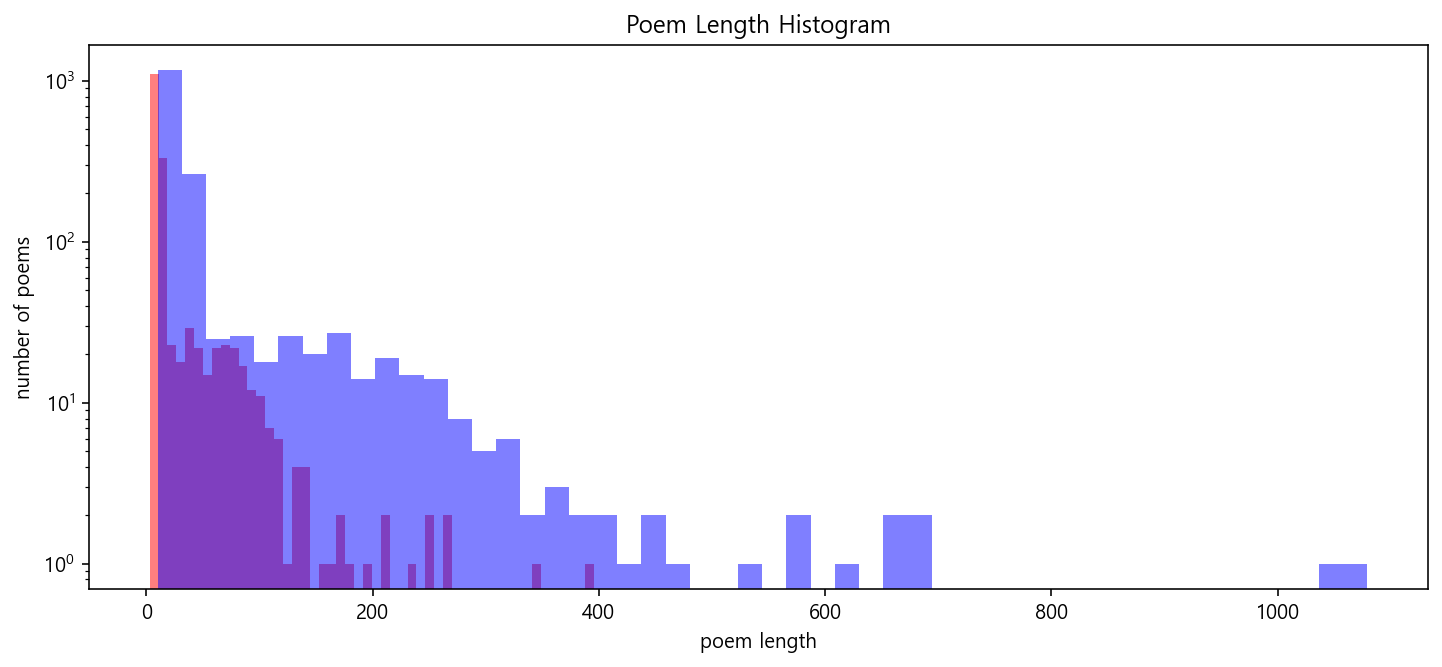

In [13]:
# 문장에 대한 길이 분포 파악
plt.figure(figsize = (12,5))

plt.hist(len_by_token, bins = 50, alpha=0.5, color="r", label="word")
plt.hist(len_by_eumjeol, bins = 50, alpha=0.5, color="b", label="aplt.yscallphabet")

plt.yscale('log', nonposy = 'clip')
plt.title('Poem Length Histogram')
plt.xlabel('poem length')
plt.ylabel('number of poems')

In [14]:
print('문장 최대 길이 : {}'.format(np.max(len_by_token)))
print('문장 최소 길이 : {}'.format(np.min(len_by_token)))
print('문장 평균 길이 : {:.2f}'.format(np.mean(len_by_token)))
print('문장 길이 표준편타 : {:.2f}'.format(np.std(len_by_token)))
print('문장 중간 길이 : {}'.format(np.median(len_by_token)))
print('제 1사분위 길이 : {}'.format(np.percentile(len_by_token, 25)))
print('제 3사분위 길이 : {}'.format(np.percentile(len_by_token, 75)))

문장 최대 길이 : 396
문장 최소 길이 : 3
문장 평균 길이 : 18.35
문장 길이 표준편타 : 30.55
문장 중간 길이 : 9.0
제 1사분위 길이 : 7.0
제 3사분위 길이 : 12.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2b0acee9cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x2b0acf50888>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b0acf50248>],
 'medians': [<matplotlib.lines.Line2D at 0x2b0acf479c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b0acf47448>],
 'means': [<matplotlib.lines.Line2D at 0x2b0acf47708>]}

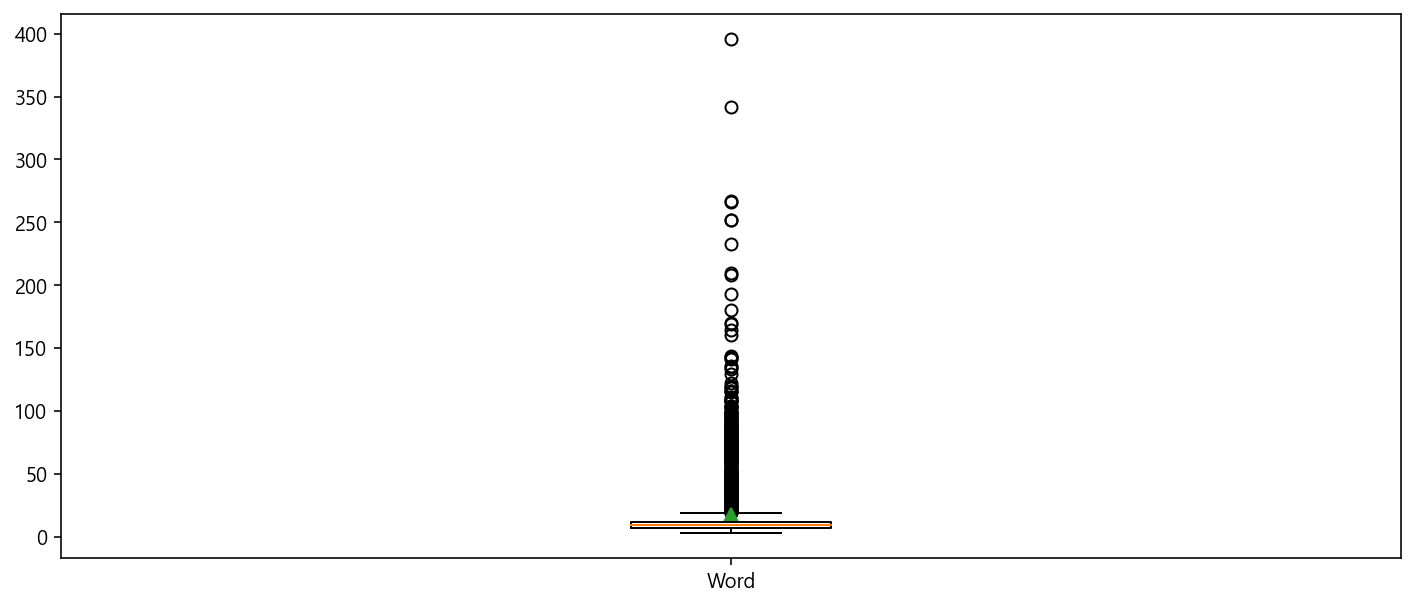

In [15]:
# 토큰 수 박스플롯
plt.figure(figsize=(12,5))
plt.boxplot([len_by_token],
            labels = ['Word'],
            showmeans=True)

In [17]:
count = Counter(sum(tokenized_data, []))
words = dict(count.most_common())
words

{'한': 195,
 '이': 188,
 '그': 174,
 '내': 160,
 '나는': 157,
 '나의': 100,
 '있는': 89,
 '없는': 88,
 '저': 82,
 '다': 80,
 '푸른': 77,
 '위에': 70,
 '어느': 68,
 '것이': 67,
 '나를': 61,
 '또': 60,
 '수': 59,
 '하고': 59,
 '없이': 58,
 '못': 57,
 '같은': 57,
 '속에': 57,
 '두': 56,
 '눈': 54,
 '것은': 50,
 '내가': 50,
 '하늘이': 49,
 '하노라': 49,
 '가는': 48,
 '네': 47,
 '다시': 47,
 '소리': 45,
 '것을': 44,
 '우리는': 44,
 '아': 44,
 '먼': 42,
 '때': 41,
 '우리': 41,
 '아니': 41,
 '것입니다': 41,
 '흰': 40,
 '큰': 40,
 '사람이': 40,
 '있다': 40,
 '누가': 39,
 '어린': 38,
 '뜻을': 38,
 '산': 38,
 '같이': 37,
 '말을': 36,
 '않고': 35,
 '좋은': 33,
 '꽃이': 33,
 '하늘': 32,
 '마음': 32,
 '혼자': 32,
 '맑은': 32,
 '너는': 31,
 '안': 30,
 '날': 30,
 '그러나': 30,
 '하나': 29,
 '듯': 29,
 '달이': 29,
 '줄': 28,
 '되어': 28,
 '하늘에': 28,
 '흐르는': 28,
 '바람에': 28,
 '마음을': 28,
 '눈이': 28,
 '작은': 27,
 '아름다운': 27,
 '더욱': 27,
 '길': 27,
 '바람': 27,
 '더': 27,
 '깊은': 27,
 '이렇게': 26,
 '일이': 26,
 '없다': 26,
 '몸이': 26,
 '것인가': 25,
 '온': 25,
 '바람이': 25,
 '해': 24,
 '한다': 24,
 '않는': 24,
 '우는': 24,
 '구름이': 24,
 '높은': 24,
 '

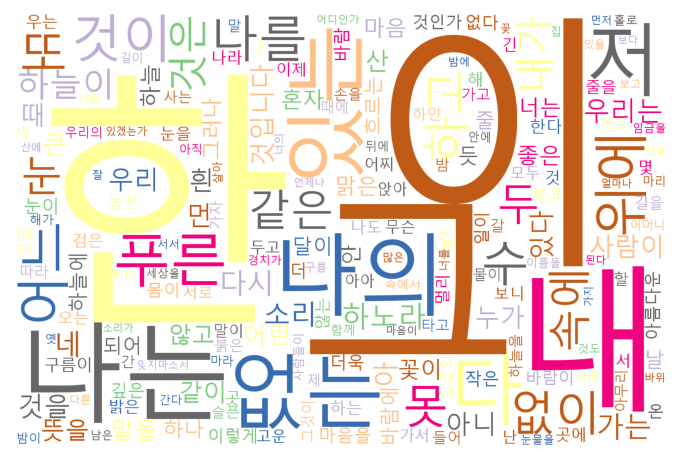

In [18]:
# 가장 빈번하게 나타나는 단어들 확인 
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(words) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()